In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas
from datetime import date
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D

%run ../global_variables.py ./
%run ../global_functions.py ./

In [2]:
%matplotlib notebook

In [3]:
basins=load_basins_data()

## Budyko functions

In [4]:
def Budyko(x):
    return np.sqrt(x*np.tanh(1/x)*(1-np.exp(-x)))

In [5]:
def compute_annual_hydro_sum(hydro_month,hydro_var_name,data,basin_name,time_overlap):
    hydro_basin=hydro_month.loc[basin_name,['{}_{} {}'.format(hydro_var_name,data,d.date()) for d in time_overlap[:-1]]].to_frame()
    hydro_basin.index=time_overlap[:-1]
    hydro_basin['year']=np.repeat(np.arange(min_year,max_year),12)
    hydro_year=hydro_basin.groupby('year').sum()
    # transform to Series
    hydro_year=pd.Series(hydro_year.values.flatten(),index=hydro_year.index,name=basin_name)
    return hydro_year

def compute_mean_annual_hydro_sum(hydro_month,hydro_var_name,data,basin_name,time_overlap):
    hydro_year=compute_annual_hydro_sum(hydro_month,hydro_var_name,data,basin_name,time_overlap)
    return hydro_year.mean()

def compute_annual_hydro_diff(hydro_month,hydro_var_name,data,basin_name,time_overlap):
    hydro_basin=hydro_month.loc[basin_name,['{}_{} {}'.format(hydro_var_name,data,d.date()) for d in time_overlap]]
    hydro_basin.index=time_overlap
    hydro_year=pd.Series(hydro_basin.values[12::12]-hydro_basin.values[:-12:12],index=np.arange(min_year,max_year))
    return hydro_year

def compute_mean_annual_hydro_diff(hydro_month,hydro_var_name,data,basin_name,time_overlap):
    hydro_year=compute_annual_hydro_diff(hydro_month,hydro_var_name,data,basin_name,time_overlap)
    return hydro_year.mean()

# 1. Mean annual timescale

In [6]:
Nbasins=154
Ndatasets=432
data_TWS='GRACE_JPL_mascons'

NSE_tab=pd.read_csv("../results/water_budget/NSE_tab_{}basins_{}datasets_{}.csv".format(Nbasins,Ndatasets,data_TWS),index_col=[0])

In [39]:
data_P='MERRA2'
data_ET='MERRA2'
data_PET='GLEAM'
data_R='MERRA2'
data_TWS='GRACE_JPL_mascons'

P_month=pd.read_csv('../results/hydrology/P_{}_monthly.csv'.format(data_P),index_col=[0])
R_month=pd.read_csv('../results/hydrology/R_{}_monthly.csv'.format(data_R),index_col=[0])
ET_month=pd.read_csv('../results/hydrology/ET_{}_monthly.csv'.format(data_ET),index_col=[0])
PET_month=pd.read_csv('../results/hydrology/PET_{}_monthly.csv'.format(data_PET),index_col=[0])
TWS_month=pd.read_csv('../results/hydrology/TWS_{}_monthly.csv'.format(data_TWS),index_col=[0])

time_P=pd.to_datetime(P_month.columns.str[2+len(data_P):])
time_ET=pd.to_datetime(ET_month.columns.str[3+len(data_ET):])
time_PET=pd.to_datetime(PET_month.columns.str[4+len(data_PET):])
time_TWS=pd.to_datetime(TWS_month.columns.str[4+len(data_TWS):])

time_idx=pd.date_range(max(time_P.min(),time_ET.min(),time_PET.min(),time_TWS.min()),
                       min(time_P.max(),time_ET.max(),time_PET.max(),time_TWS.max()),
                      freq='SM')[::2]

min_year=np.unique(time_idx.year).min()
max_year=np.unique(time_idx.year).max()
month_start=5 # data computed from May to April
time_overlap=pd.date_range(start=date(min_year,month_start,1),end=date(max_year,month_start+1,1),freq='SM')[::2]

In [40]:
time_P=pd.to_datetime(P_month.columns.str[2+len(data_P):])
time_ET=pd.to_datetime(ET_month.columns.str[3+len(data_ET):])
time_PET=pd.to_datetime(PET_month.columns.str[4+len(data_PET):])
time_TWS=pd.to_datetime(TWS_month.columns.str[4+len(data_TWS):])

time_idx=pd.date_range(max(time_P.min(),time_ET.min(),time_PET.min(),time_TWS.min()),
                       min(time_P.max(),time_ET.max(),time_PET.max(),time_TWS.max()),
                      freq='SM')[::2]

In [41]:
min_year=np.unique(time_idx.year).min()
max_year=np.unique(time_idx.year).max()
month_start=5 # data computed from May to April
time_overlap=pd.date_range(start=date(min_year,month_start,1),end=date(max_year,month_start+1,1),freq='SM')[::2]

<IPython.core.display.Javascript object>


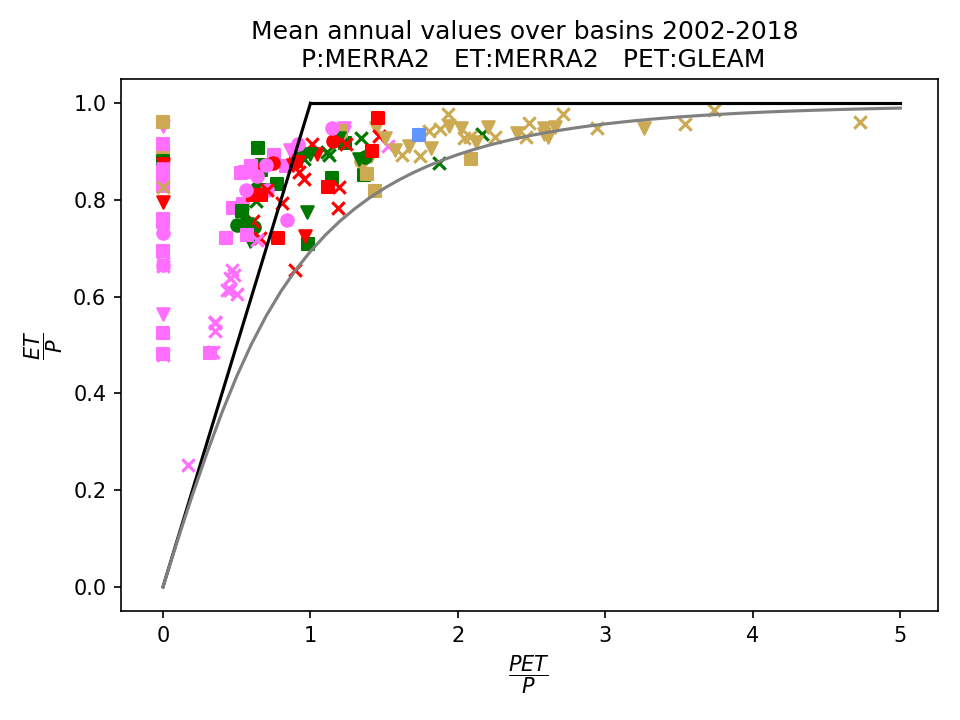

KHATANGA is above the energy limit
ODER RIVER is above the energy limit
ELBE RIVER is above the energy limit
RHINE is above the energy limit
ALBANY RIVER is above the energy limit
SAGUENAY (RIVIERE) is above the energy limit
NOTTAWAY is above the energy limit
MOOSE RIVER (TRIB. HUDS is above the energy limit
ST.LAWRENCE is above the energy limit
DANUBE is above the energy limit
SEINE is above the energy limit
DNIESTR is above the energy limit
MISSISSIPPI RIVER is above the energy limit
LOIRE is above the energy limit
RHONE is above the energy limit
PO is above the energy limit
KOLYMA is above the energy limit
SUSQUEHANNA RIVER is above the energy limit
YUKON RIVER is above the energy limit
YANGTZE RIVER (CHANG JI is above the energy limit
HUAI HE is above the energy limit
MACKENZIE RIVER is above the energy limit
NILE is above the energy limit
BRAHMAPUTRA is above the energy limit
OLENEK is above the energy limit
XI JIANG is above the energy limit
ANADYR is above the energy limit
SANTI

In [44]:
DS=False # account for water storage variations
useR=False # whether to plot ET or P-R-Ds

xmax=5
X=np.arange(1e-6,xmax+0.1,0.1)

plt.figure()
plt.plot([0,1],[0,1],'k')
plt.plot([1,xmax],[1,1],'k')
plt.plot(X,Budyko(X),color='grey')

for basin_name in NSE_tab.index:
    P=compute_mean_annual_hydro_sum(P_month,'P',data_P,basin_name,time_overlap)
    ET=compute_mean_annual_hydro_sum(ET_month,'ET',data_ET,basin_name,time_overlap)
    PET=compute_mean_annual_hydro_sum(PET_month,'PET',data_PET,basin_name,time_overlap)
    TWS=compute_mean_annual_hydro_diff(TWS_month,'TWS',data_TWS,basin_name,time_overlap)
    
    if DS:
        x=PET/(P-TWS)
        y=ET/(P-TWS)
    else:
        x=PET/P
        y=ET/P
    
    if x>xmax:
        print('{} is above the x limit of {} with PET/P={:.2f}'.format(basin_name,
                                                            xmax,x))        
    else:
        NSE_basin=NSE_tab.loc[basin_name,'P_{}_ET_{}_R_{}_TWS_{}'.format(data_P,data_ET,data_R,data_TWS)]
        if NSE_basin>=0.75:
            marker='o'
        elif NSE_basin>=0.5:
            marker='s'
        elif NSE_basin>=0.2:
            marker='v'
        else:
            marker='x'
        plt.scatter(x,y,c=basins.loc[basin_name,'COLOR'],marker=marker)
        
    if y>x:
        print('{} is above the energy limit'.format(basin_name))
    if y>1:
        print('{} is above the water limit'.format(basin_name))
          

#plt.xlim([0,xmax])
#plt.ylim([0,1.3])
if DS:
    plt.xlabel('$\dfrac{PET}{P-\Delta S}$')
    plt.ylabel('$\dfrac{ET}{P-\Delta S}$')
    plt.title('Mean annual values over basins {}-{} \n P:{}   ET:{}   PET:{}  TWS:{}'.format(time_idx[0].year,
                                        time_idx[-1].year,data_P,data_ET,data_PET,data_TWS[6:]))
else:
    plt.xlabel('$\dfrac{PET}{P}$')
    plt.ylabel('$\dfrac{ET}{P}$')
    plt.title('Mean annual values over basins {}-{} \n P:{}   ET:{}   PET:{}'.format(time_idx[0].year,
                                        time_idx[-1].year,data_P,data_ET,data_PET))
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


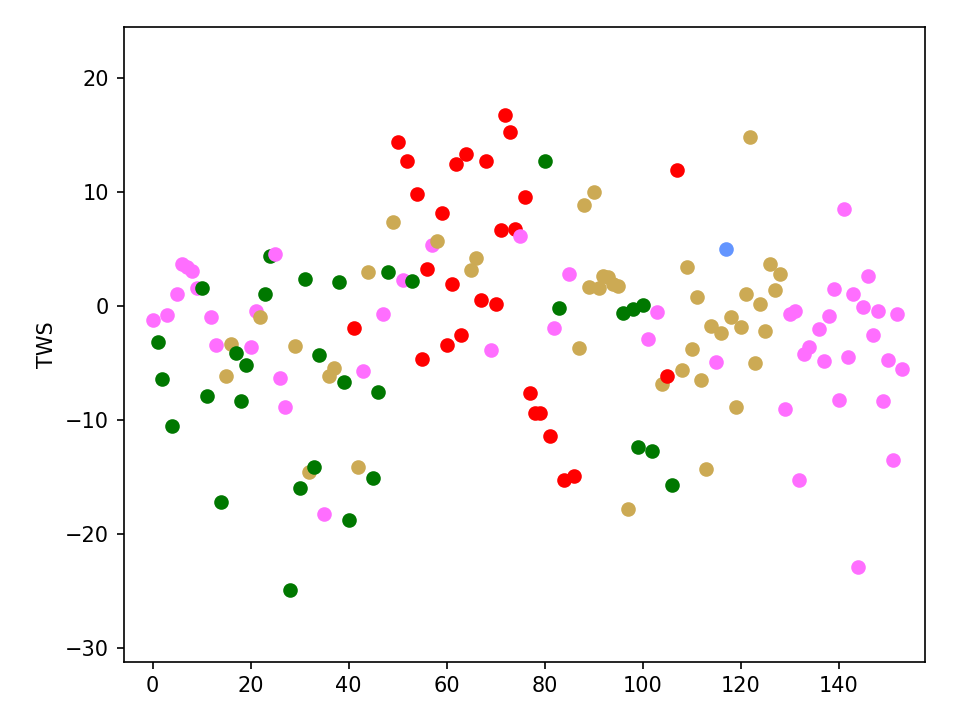

In [12]:
DS=False # account for water storage variations
useR=False # whether to plot ET or P-R-Ds

plt.figure()

for i,basin_name in enumerate(NSE_tab.index):
    TWS=compute_mean_annual_hydro_diff(TWS_month,'TWS',data_TWS,basin_name,time_overlap)
    
    plt.scatter(i,TWS,c=basins.loc[basin_name,'COLOR'])
        
plt.ylabel('TWS')
plt.tight_layout()
plt.show()

In [ ]:
DS=True # account for water storage variations
useR=False # whether to use ET or P-R-DS for actual ET
save=False

xmax=3
X=np.arange(1e-6,xmax+0.1,0.1)

fig, ax = plt.subplots()
ax.plot([0,1],[0,1],'k')
ax.plot([1,xmax],[1,1],'k')
ax.plot(X,Budyko(X),color='grey')

ET_annual=to_annual_mean(ET)
P_annual=to_annual_mean(P)
R_annual=to_annual_mean(R)
PET_annual=to_annual_mean(PET)
TWS_annual=to_annual_mean(TWS)

if useR:
    if DS:
        x=PET_annual.values/(P_annual.values-TWS_annual.values)
        y=1-R_annual.values/(P_annual.values-TWS_annual.values)
    else:
        x=PET_annual.values/P_annual.values
        y=1-(R_annual.values+TWS_annual.values)/P_annual.values
else:
    if DS:
        x=PET_annual.values/(P_annual.values-TWS_annual.values)
        y=ET_annual.values/(P_annual.values-TWS_annual.values)
    else:
        x=PET_annual.values/P_annual.values
        y=ET_annual.values/P_annual.values
        
# edgecolors depending on year        
nb_year=x.shape[0]-1
cmap=cm.get_cmap('OrRd',nb_year)
color_years=cmap((P_annual.index-P_annual.index[0])/nb_year)
scatter=ax.scatter(x.flatten(),y.flatten(),c=P_annual.index,cmap=cm.get_cmap('OrRd'))

# facecolors depending on TWS
nb_year=x.shape[0]-1
# colormap
#cmap=cm.get_cmap('coolwarm',nb_year)
#color_TWS=cmap(normalize(TWS_annual,a=0,b=1).values.flatten())

# 2 colors
color_TWS=np.where(TWS_annual.values.flatten()<0,'red','blue')

ax.scatter(x.flatten(),y.flatten(),c=color_TWS,edgecolors=color_years,linewidths=2)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="year",ncol=3)
ax.add_artist(legend1)

#plt.xlim([0,xmax])
#plt.ylim([0,1.3])
if useR:
    if DS:
        ax.set_xlabel('$\dfrac{PET}{P-\Delta S}$')
        ax.set_ylabel('$1-\dfrac{R}{P-\Delta S}$')
        ax.set_title('Annual values in {} {}-{} \n P:{}   R:{}   PET:{}   TWS:{}'.format(basin_name,time_idx[0].year,
                                            time_idx[-1].year,data_P,data_R,data_PET,data_TWS))
        if save:
            fig.savefig('../plots/budyko_curves/annual_{}_R_TWS.png'.format(basin_name))
    else:
        ax.set_xlabel('$\dfrac{PET}{P}$')
        ax.set_ylabel('$1-\dfrac{R+\Delta S}{P}$')
        ax.set_title('Annual values in {} {}-{} \n P:{}   R:{}   PET:{}'.format(basin_name,time_idx[0].year,
                                            time_idx[-1].year,data_P,data_R,data_PET))
        if save:
            fig.savefig('../plots/budyko_curves/annual_{}_R.png'.format(basin_name))
else:
    if DS:
        ax.set_xlabel('$\dfrac{PET}{P-\Delta S}$')
        ax.set_ylabel('$\dfrac{ET}{P-\Delta S}$')
        ax.set_title('Annual values in {} {}-{} \n P:{}   ET:{}   PET:{}   TWS:{}'.format(basin_name,time_idx[0].year,
                                            time_idx[-1].year,data_P,data_ET,data_PET,data_TWS))
        if save:
            fig.savefig('../plots/budyko_curves/annual_{}_TWS.png'.format(basin_name))
    else:
        ax.set_xlabel('$\dfrac{PET}{P}$')
        ax.set_ylabel('$\dfrac{ET}{P}$')
        ax.set_title('Annual values in {} {}-{} \n P:{}   ET:{}   PET:{}'.format(basin_name,time_idx[0].year,
                                            time_idx[-1].year,data_P,data_ET,data_PET))
        if save:
            fig.savefig('../plots/budyko_curves/annual_{}.png'.format(basin_name))
fig.tight_layout()
plt.show()

## Annual timescale

In [7]:
data_P='GPCP'
data_ET='GLDAS20_CLSM25'
data_PET='SSEBop'
data_R='GRUN'
data_TWS='GRACE_JPL_mascons'

P_month=pd.read_csv('../results/hydrology/P_{}_monthly.csv'.format(data_P),index_col=[0])
R_month=pd.read_csv('../results/hydrology/R_{}_monthly.csv'.format(data_R),index_col=[0])
ET_month=pd.read_csv('../results/hydrology/ET_{}_monthly.csv'.format(data_ET),index_col=[0])
PET_month=pd.read_csv('../results/hydrology/PET_{}_monthly.csv'.format(data_PET),index_col=[0])
TWS_month=pd.read_csv('../results/hydrology/TWS_{}_monthly.csv'.format(data_TWS),index_col=[0])

time_P=pd.to_datetime(P_month.columns.str[2+len(data_P):])
time_ET=pd.to_datetime(ET_month.columns.str[3+len(data_ET):])
time_PET=pd.to_datetime(PET_month.columns.str[4+len(data_PET):])
time_TWS=pd.to_datetime(TWS_month.columns.str[4+len(data_TWS):])

time_idx=pd.date_range(max(time_P.min(),time_ET.min(),time_PET.min(),time_TWS.min()),
                       min(time_P.max(),time_ET.max(),time_PET.max(),time_TWS.max()),
                      freq='SM')[::2]

min_year=np.unique(time_idx.year).min()
max_year=np.unique(time_idx.year).max()
month_start=5 # data computed from May to April
time_overlap=pd.date_range(start=date(min_year,month_start,1),end=date(max_year,month_start+1,1),freq='SM')[::2]

In [12]:
basin_name='MISSISSIPPI RIVER'

<IPython.core.display.Javascript object>


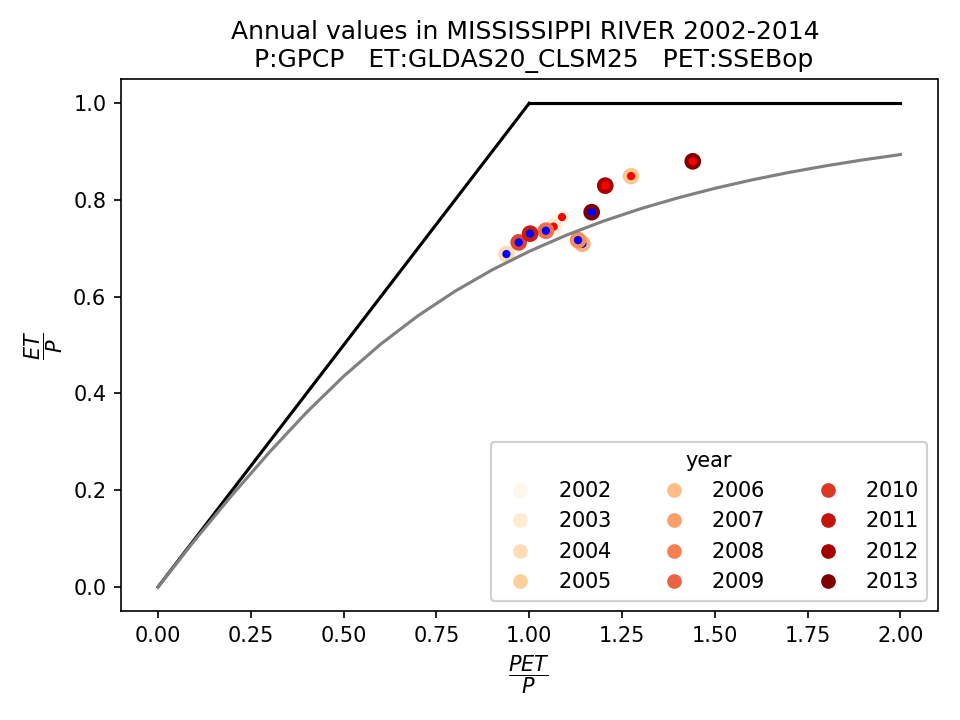

In [13]:
DS=False # account for water storage variations
useR=False # whether to plot ET or P-R-Ds

xmax=2
X=np.arange(1e-6,xmax+0.1,0.1)

fig, ax = plt.subplots()
ax.plot([0,1],[0,1],'k')
ax.plot([1,xmax],[1,1],'k')
ax.plot(X,Budyko(X),color='grey')

P_year=compute_annual_hydro_sum(P_month,'P',data_P,basin_name,time_overlap)
ET_year=compute_annual_hydro_sum(ET_month,'ET',data_ET,basin_name,time_overlap)
PET_year=compute_annual_hydro_sum(PET_month,'PET',data_PET,basin_name,time_overlap)
TWS_year=compute_annual_hydro_diff(TWS_month,'TWS',data_TWS,basin_name,time_overlap)
    
if DS:
    x=PET_year/(P_year-TWS_year)
    y=ET_year/(P_year-TWS_year)
else:
    x=PET_year/P_year
    y=ET_year/P_year
    
# edgecolors depending on year        
nb_year=x.shape[0]-1
cmap=cm.get_cmap('OrRd',nb_year)
color_years=cmap((P_year.index-P_year.index[0])/nb_year)
#scatter=ax.scatter(x,y,c=P_year.index,cmap=cm.get_cmap('OrRd'))

# facecolors depending on TWS
nb_year=x.shape[0]-1
# colormap
#cmap=cm.get_cmap('coolwarm',nb_year)
color_TWS=cmap(normalize(TWS_annual,a=0,b=1).values.flatten())

# 2 colors
color_TWS=np.where(TWS_year.values.flatten()<0,'red','blue')

ax.scatter(x,y,c=color_TWS,edgecolors=color_years,linewidths=2)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="year",ncol=3)
ax.add_artist(legend1)
#plt.scatter(x,y,c=basins.loc[basin_name,'COLOR'],marker=marker)
          

#plt.xlim([0,xmax])
#plt.ylim([0,1.3])
if DS:
    ax.set_xlabel('$\dfrac{PET}{P-\Delta S}$')
    ax.set_ylabel('$\dfrac{ET}{P-\Delta S}$')
    ax.set_title('Annual values in {} {}-{} \n P:{}   ET:{}   PET:{}  TWS:{}'.format(basin_name,min_year,
                                        max_year,data_P,data_ET,data_PET,data_TWS[6:]))
else:
    ax.set_xlabel('$\dfrac{PET}{P}$')
    ax.set_ylabel('$\dfrac{ET}{P}$')
    ax.set_title('Annual values in {} {}-{} \n P:{}   ET:{}   PET:{}'.format(basin_name,min_year,
                                        max_year,data_P,data_ET,data_PET))
fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


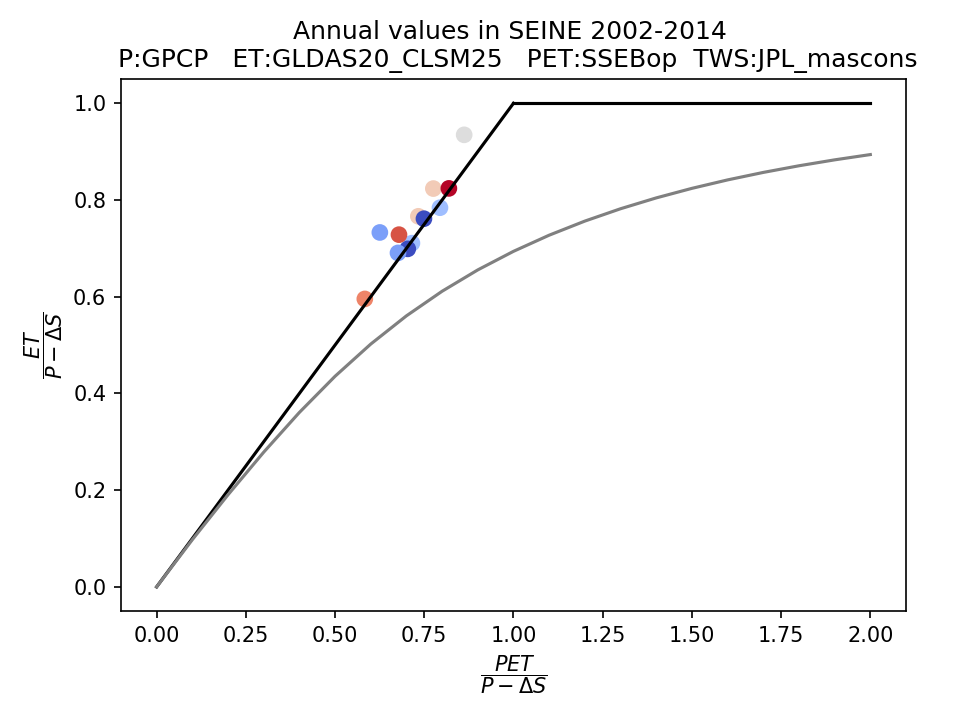

In [22]:
basin_name='SEINE'

DS=True # account for water storage variations
useR=False # whether to plot ET or P-R-Ds

xmax=2
X=np.arange(1e-6,xmax+0.1,0.1)

fig, ax = plt.subplots()
ax.plot([0,1],[0,1],'k')
ax.plot([1,xmax],[1,1],'k')
ax.plot(X,Budyko(X),color='grey')

P_year=compute_annual_hydro_sum(P_month,'P',data_P,basin_name,time_overlap)
ET_year=compute_annual_hydro_sum(ET_month,'ET',data_ET,basin_name,time_overlap)
PET_year=compute_annual_hydro_sum(PET_month,'PET',data_PET,basin_name,time_overlap)
TWS_year=compute_annual_hydro_diff(TWS_month,'TWS',data_TWS,basin_name,time_overlap)
    
if DS:
    x=PET_year/(P_year-TWS_year)
    y=ET_year/(P_year-TWS_year)
else:
    x=PET_year/P_year
    y=ET_year/P_year
    

# facecolors depending on TWS/P
nb_year=x.shape[0]-1
# colormap
cmap=cm.get_cmap('coolwarm',nb_year)
color_TWS=cmap(normalize(TWS_year/P_year,a=0,b=1).values.flatten())

# 2 colors
#color_TWS=np.where(TWS_year.values.flatten()<0,'red','blue')

ax.scatter(x,y,c=color_TWS,linewidths=2)

#plt.scatter(x,y,c=basins.loc[basin_name,'COLOR'],marker=marker)
          

#plt.xlim([0,xmax])
#plt.ylim([0,1.3])
if DS:
    ax.set_xlabel('$\dfrac{PET}{P-\Delta S}$')
    ax.set_ylabel('$\dfrac{ET}{P-\Delta S}$')
    ax.set_title('Annual values in {} {}-{} \n P:{}   ET:{}   PET:{}  TWS:{}'.format(basin_name,min_year,
                                        max_year,data_P,data_ET,data_PET,data_TWS[6:]))
else:
    ax.set_xlabel('$\dfrac{PET}{P}$')
    ax.set_ylabel('$\dfrac{ET}{P}$')
    ax.set_title('Annual values in {} {}-{} \n P:{}   ET:{}   PET:{}'.format(basin_name,min_year,
                                        max_year,data_P,data_ET,data_PET))
fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


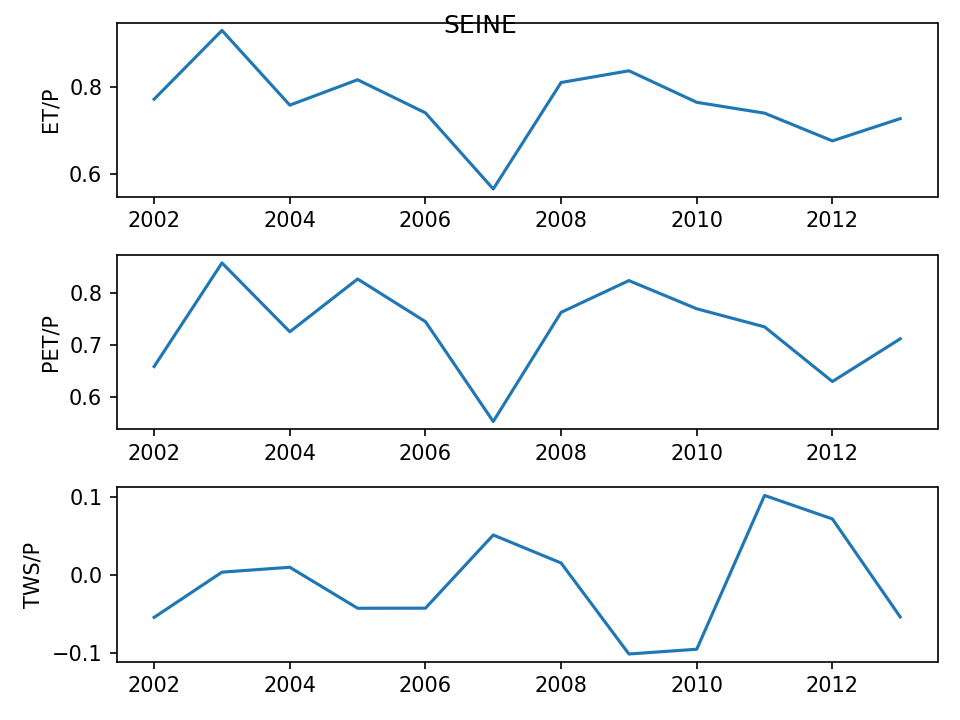

In [23]:
plt.figure()
plt.subplot(3,1,1)
plt.plot(ET_year/P_year)
plt.ylabel('ET/P')

plt.subplot(3,1,2)
plt.plot(PET_year/P_year)
plt.ylabel('PET/P')

plt.subplot(3,1,3)
plt.plot(TWS_year/P_year)
plt.ylabel('TWS/P')

plt.suptitle(basin_name)
plt.tight_layout()
plt.show()

## Mean annual with the best performing datasets

In [6]:
max_NSE=pd.read_csv('../results/water_budget/maxNSE_107basins_360datasets.csv',index_col=[0])

<IPython.core.display.Javascript object>


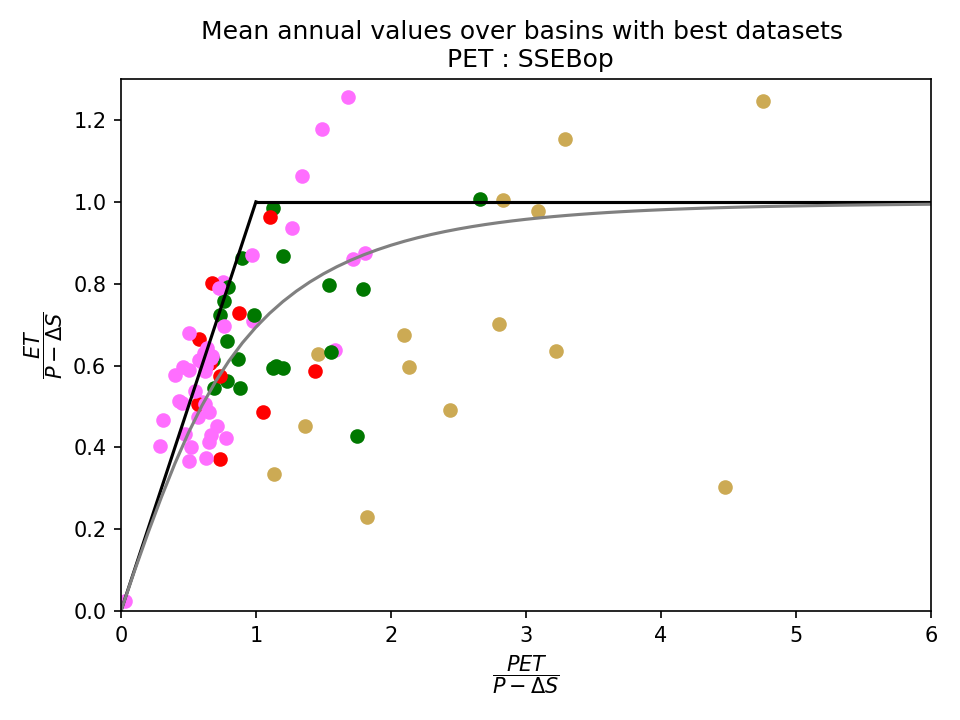

RHINE is above the energy limit
ALBANY RIVER is above the energy limit
SAGUENAY (RIVIERE) is above the energy limit
NOTTAWAY is above the energy limit
ST.LAWRENCE is above the energy limit
ST.LAWRENCE is above the water limit
MISSISSIPPI RIVER is above the water limit
SUSQUEHANNA RIVER is above the energy limit
TEJO is above the water limit
NIGER is above the water limit
VOLTA is above the water limit
ORINOCO is above the energy limit
OB is above the water limit
AMAZONAS is above the energy limit
ZAMBEZI is above the water limit
BURDEKIN is above the x limit of 6 with PET/P=10.73
BURDEKIN is above the water limit
LIMPOPO is above the water limit
FITZROY is above the x limit of 6 with PET/P=429.29
FITZROY is above the water limit
ORANGE is above the water limit
ASHBURTON RIVER is above the x limit of 6 with PET/P=6.69
MURRAY is above the x limit of 6 with PET/P=323.69
MURRAY is above the water limit
MURCHISON RIVER is above the x limit of 6 with PET/P=16.64
MURCHISON RIVER is above the 

In [13]:
DS=True # account for water storage variations
useR=False # whether to plot ET or P-R-Ds

data_PET='SSEBop'
xmax=6
X=np.arange(1e-6,xmax+0.1,0.1)

plt.figure()
plt.plot([0,1],[0,1],'k')
plt.plot([1,xmax],[1,1],'k')
plt.plot(X,Budyko(X),color='grey')

for basin_name in max_NSE.index:
    data_P,data_ET,data_R,data_TWS=find_best_dataset(basin_name,max_NSE)
    P_month=pd.read_csv('../results/hydrology/P_{}_monthly.csv'.format(data_P),index_col=[0])
    ET_month=pd.read_csv('../results/hydrology/ET_{}_monthly.csv'.format(data_ET),index_col=[0])
    R_month=pd.read_csv('../results/hydrology/R_{}_monthly.csv'.format(data_R),index_col=[0])
    PET_month=pd.read_csv('../results/hydrology/PET_{}_monthly.csv'.format(data_PET),index_col=[0])
    TWS_month=pd.read_csv('../results/hydrology/TWS_{}_monthly.csv'.format(data_TWS),index_col=[0])
    
    # compute common months    
    time_P=pd.to_datetime(P_month.columns.str[2+len(data_P):])
    P_month.columns=time_P
    time_ET=pd.to_datetime(ET_month.columns.str[3+len(data_ET):])
    ET_month.columns=time_ET
    time_R=pd.to_datetime(R_month.columns.str[2+len(data_R):])
    R_month.columns=time_R
    time_PET=pd.to_datetime(PET_month.columns.str[4+len(data_PET):])
    PET_month.columns=time_PET
    time_TWS=pd.to_datetime(TWS_month.columns.str[4+len(data_TWS):])
    TWS_month.columns=time_TWS

    time_idx=pd.date_range(max(time_P.min(),time_ET.min(),time_R.min(),time_PET.min(),time_TWS.min()),
                           min(time_P.max(),time_ET.max(),time_R.max(),time_PET.max(),time_TWS.max()),
                          freq='SM')[::2]
    
    # select common months    
    ET=ET_month.loc[basin_name,time_idx]
    P=P_month.loc[basin_name,time_idx]
    PET=PET_month.loc[basin_name,time_idx]
    TWS=TWS_month.loc[basin_name,time_idx]
    
    
    if DS:
        #PET=time_filter(PET).mean()
        #ET=time_filter(ET).mean()
        #P=time_filter(P).mean()
        #TWS=derivative(TWS).mean()
        ET=ET.mean()
        PET=PET.mean()
        P=P.mean()
        TWS=TWS.mean()
        x=PET/(P-TWS)
        y=ET/(P-TWS)
    else:
        ET=ET.mean()
        PET=PET.mean()
        P=P.mean()
        x=PET/P
        y=ET/P
    
    if x>xmax:
        print('{} is above the x limit of {} with PET/P={:.2f}'.format(basin_name,
                                                            xmax,x))
    else:
        plt.scatter(x,y,c=basins.loc[basin_name,'COLOR'])
        
    if y>x:
        print('{} is above the energy limit'.format(basin_name))
    if y>1:
         print('{} is above the water limit'.format(basin_name))  

plt.xlim([0,xmax])
plt.ylim([0,1.3])
if DS:
    plt.xlabel('$\dfrac{PET}{P-\Delta S}$')
    plt.ylabel('$\dfrac{ET}{P-\Delta S}$')
    plt.title('Mean annual values over basins with best datasets \n PET : {}'.format(data_PET))
else:
    plt.xlabel('$\dfrac{PET}{P}$')
    plt.ylabel('$\dfrac{ET}{P}$')
    plt.title('Mean annual values over basins with best datasets  \n PET : {}'.format(data_PET))
plt.tight_layout()
plt.show()

In [20]:
P=P_month.loc[basin_name,time_idx]
P=P.to_frame(name='P')
P['year']=P.index.year

In [25]:
P['P']=P['P']-P.loc[(P['year']>=2004)&((P['year']<=2009)),'P'].mean()
P

,P,year
2003-01-15,3.500536,2003
2003-02-15,-21.708767,2003
2003-03-15,-29.174559,2003
2003-04-15,-16.496313,2003
2003-05-15,-14.923389,2003
...,...,...
2016-08-15,16.655117,2016
2016-09-15,5.974704,2016
2016-10-15,-19.381293,2016
2016-11-15,14.361673,2016


In [17]:
P_annual=to_annual_mean(P)
P_annual

,DON
year,
2003,46.803534
2004,58.397208
2005,51.100702
2006,48.713396
2007,42.060812
2008,38.043096
2009,40.896875
2010,43.064499
2011,42.239248


# 2. Annual timescale

In [14]:
def to_annual_mean(X):
    X=X.to_frame()
    X['year']=X.index.year
    return X.groupby('year').mean()

In [15]:
max_NSE=pd.read_csv('../results/water_budget/maxNSE_107basins_360datasets.csv',index_col=[0])

In [21]:
#basin_name='YANGTZE RIVER (CHANG JI'
basin_name='COLUMBIA RIVER'
data_P,data_ET,data_R,data_TWS=find_best_dataset(basin_name,max_NSE)
data_PET='CRU'
data_TWS='GRACE_JPL'

P_month=pd.read_csv('../results/hydrology/P_{}_monthly.csv'.format(data_P),index_col=[0])
ET_month=pd.read_csv('../results/hydrology/ET_{}_monthly.csv'.format(data_ET),index_col=[0])
R_month=pd.read_csv('../results/hydrology/R_{}_monthly.csv'.format(data_R),index_col=[0])
PET_month=pd.read_csv('../results/hydrology/PET_{}_monthly.csv'.format(data_PET),index_col=[0])
TWS_month=pd.read_csv('../results/hydrology/TWS_{}_monthly.csv'.format(data_TWS),index_col=[0])

In [22]:
time_P=pd.to_datetime(P_month.columns.str[2+len(data_P):])
P_month.columns=time_P
time_ET=pd.to_datetime(ET_month.columns.str[3+len(data_ET):])
ET_month.columns=time_ET
time_R=pd.to_datetime(R_month.columns.str[2+len(data_R):])
R_month.columns=time_R
time_PET=pd.to_datetime(PET_month.columns.str[4+len(data_PET):])
PET_month.columns=time_PET
time_TWS=pd.to_datetime(TWS_month.columns.str[4+len(data_TWS):])
TWS_month.columns=time_TWS

time_idx=pd.date_range(max(time_P.min(),time_ET.min(),time_R.min(),time_PET.min(),time_TWS.min()),
                       min(time_P.max(),time_ET.max(),time_R.max(),time_PET.max(),time_TWS.max()),
                      freq='SM')[::2]

In [23]:
ET=ET_month.loc[basin_name,time_idx]
P=P_month.loc[basin_name,time_idx]
R=R_month.loc[basin_name,time_idx]
PET=PET_month.loc[basin_name,time_idx]
TWS=TWS_month.loc[basin_name,time_idx]

<IPython.core.display.Javascript object>


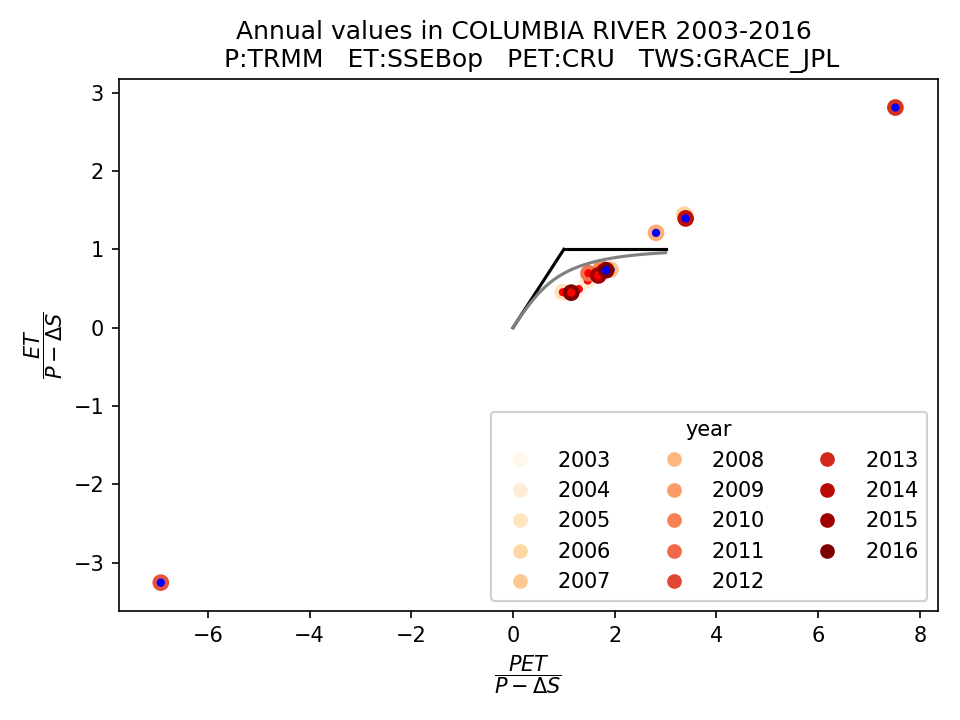

In [25]:
DS=True # account for water storage variations
useR=False # whether to use ET or P-R-DS for actual ET
save=False

xmax=3
X=np.arange(1e-6,xmax+0.1,0.1)

fig, ax = plt.subplots()
ax.plot([0,1],[0,1],'k')
ax.plot([1,xmax],[1,1],'k')
ax.plot(X,Budyko(X),color='grey')

ET_annual=to_annual_mean(ET)
P_annual=to_annual_mean(P)
R_annual=to_annual_mean(R)
PET_annual=to_annual_mean(PET)
TWS_annual=to_annual_mean(TWS)

if useR:
    if DS:
        x=PET_annual.values/(P_annual.values-TWS_annual.values)
        y=1-R_annual.values/(P_annual.values-TWS_annual.values)
    else:
        x=PET_annual.values/P_annual.values
        y=1-(R_annual.values+TWS_annual.values)/P_annual.values
else:
    if DS:
        x=PET_annual.values/(P_annual.values-TWS_annual.values)
        y=ET_annual.values/(P_annual.values-TWS_annual.values)
    else:
        x=PET_annual.values/P_annual.values
        y=ET_annual.values/P_annual.values
        
# edgecolors depending on year        
nb_year=x.shape[0]-1
cmap=cm.get_cmap('OrRd',nb_year)
color_years=cmap((P_annual.index-P_annual.index[0])/nb_year)
scatter=ax.scatter(x.flatten(),y.flatten(),c=P_annual.index,cmap=cm.get_cmap('OrRd'))

# facecolors depending on TWS
nb_year=x.shape[0]-1
# colormap
#cmap=cm.get_cmap('coolwarm',nb_year)
#color_TWS=cmap(normalize(TWS_annual,a=0,b=1).values.flatten())

# 2 colors
color_TWS=np.where(TWS_annual.values.flatten()<0,'red','blue')

ax.scatter(x.flatten(),y.flatten(),c=color_TWS,edgecolors=color_years,linewidths=2)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="year",ncol=3)
ax.add_artist(legend1)

#plt.xlim([0,xmax])
#plt.ylim([0,1.3])
if useR:
    if DS:
        ax.set_xlabel('$\dfrac{PET}{P-\Delta S}$')
        ax.set_ylabel('$1-\dfrac{R}{P-\Delta S}$')
        ax.set_title('Annual values in {} {}-{} \n P:{}   R:{}   PET:{}   TWS:{}'.format(basin_name,time_idx[0].year,
                                            time_idx[-1].year,data_P,data_R,data_PET,data_TWS))
        if save:
            fig.savefig('../plots/budyko_curves/annual_{}_R_TWS.png'.format(basin_name))
    else:
        ax.set_xlabel('$\dfrac{PET}{P}$')
        ax.set_ylabel('$1-\dfrac{R+\Delta S}{P}$')
        ax.set_title('Annual values in {} {}-{} \n P:{}   R:{}   PET:{}'.format(basin_name,time_idx[0].year,
                                            time_idx[-1].year,data_P,data_R,data_PET))
        if save:
            fig.savefig('../plots/budyko_curves/annual_{}_R.png'.format(basin_name))
else:
    if DS:
        ax.set_xlabel('$\dfrac{PET}{P-\Delta S}$')
        ax.set_ylabel('$\dfrac{ET}{P-\Delta S}$')
        ax.set_title('Annual values in {} {}-{} \n P:{}   ET:{}   PET:{}   TWS:{}'.format(basin_name,time_idx[0].year,
                                            time_idx[-1].year,data_P,data_ET,data_PET,data_TWS))
        if save:
            fig.savefig('../plots/budyko_curves/annual_{}_TWS.png'.format(basin_name))
    else:
        ax.set_xlabel('$\dfrac{PET}{P}$')
        ax.set_ylabel('$\dfrac{ET}{P}$')
        ax.set_title('Annual values in {} {}-{} \n P:{}   ET:{}   PET:{}'.format(basin_name,time_idx[0].year,
                                            time_idx[-1].year,data_P,data_ET,data_PET))
        if save:
            fig.savefig('../plots/budyko_curves/annual_{}.png'.format(basin_name))
fig.tight_layout()
plt.show()

# 3. Monthly timescale

In [26]:
max_NSE=pd.read_csv('../results/water_budget/maxNSE_107basins_360datasets.csv',index_col=[0])

In [28]:
#basin_name='YANGTZE RIVER (CHANG JI'
basin_name='COLUMBIA RIVER'
data_P,data_ET,data_R,data_TWS=find_best_dataset(basin_name,max_NSE)
data_PET='SSEBop'
data_TWS='GRACE_JPL'

P_month=pd.read_csv('../results/hydrology/P_{}_monthly.csv'.format(data_P),index_col=[0])
ET_month=pd.read_csv('../results/hydrology/ET_{}_monthly.csv'.format(data_ET),index_col=[0])
R_month=pd.read_csv('../results/hydrology/R_{}_monthly.csv'.format(data_R),index_col=[0])
PET_month=pd.read_csv('../results/hydrology/PET_{}_monthly.csv'.format(data_PET),index_col=[0])
TWS_month=pd.read_csv('../results/hydrology/TWS_{}_monthly.csv'.format(data_TWS),index_col=[0])

In [29]:
time_P=pd.to_datetime(P_month.columns.str[2+len(data_P):])
P_month.columns=time_P
time_ET=pd.to_datetime(ET_month.columns.str[3+len(data_ET):])
ET_month.columns=time_ET
time_R=pd.to_datetime(R_month.columns.str[2+len(data_R):])
R_month.columns=time_R
time_PET=pd.to_datetime(PET_month.columns.str[4+len(data_PET):])
PET_month.columns=time_PET
time_TWS=pd.to_datetime(TWS_month.columns.str[4+len(data_TWS):])
TWS_month.columns=time_TWS

time_idx=pd.date_range(max(time_P.min(),time_ET.min(),time_R.min(),time_PET.min(),time_TWS.min()),
                       min(time_P.max(),time_ET.max(),time_R.max(),time_PET.max(),time_TWS.max()),
                      freq='SM')[::2]

In [30]:
ET=ET_month.loc[basin_name,time_idx]
P=P_month.loc[basin_name,time_idx]
R=R_month.loc[basin_name,time_idx]
PET=PET_month.loc[basin_name,time_idx]
TWS=TWS_month.loc[basin_name,time_idx]

In [31]:
nb_year=np.unique(time_idx.year).shape[0]-1
(time_idx.year-time_idx.year[0])/nb_year

Float64Index([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
              ...
              1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
             dtype='float64', length=168)

<IPython.core.display.Javascript object>


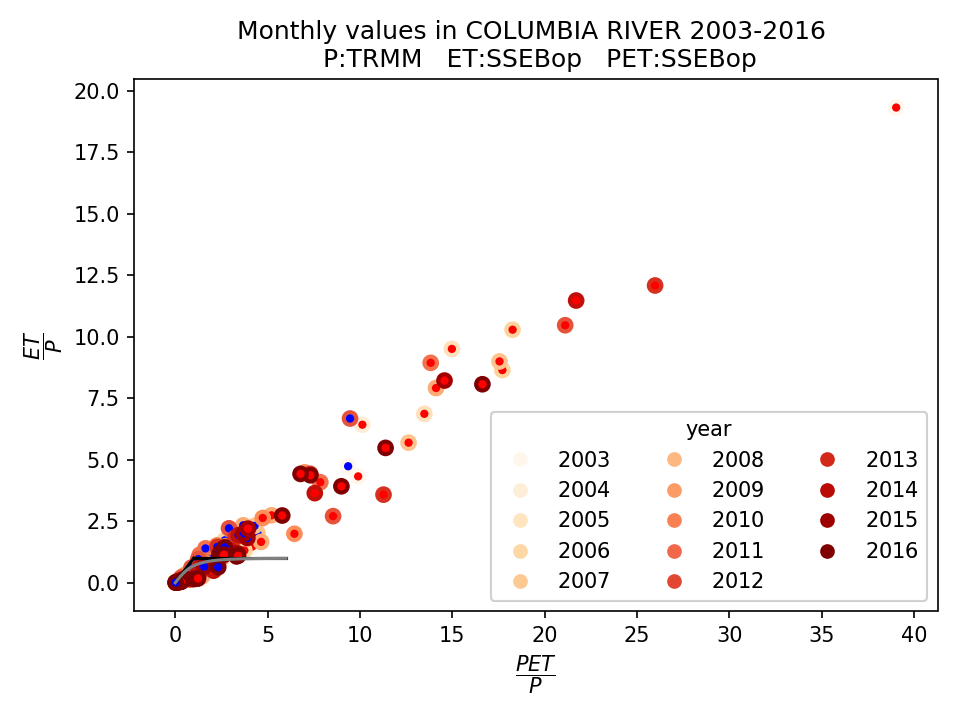

In [32]:
DS=False # account for water storage variations
useR=False # whether to use ET or P-R-DS for actual ET
save=False

xmax=6
X=np.arange(1e-6,xmax+0.1,0.1)

fig, ax = plt.subplots()
ax.plot([0,1],[0,1],'k')
ax.plot([1,xmax],[1,1],'k')
ax.plot(X,Budyko(X),color='grey')

if useR:
    if DS:
        x=PET.values/(P.values-TWS.values)
        y=1-R.values/(P.values-TWS.values)
    else:
        x=PET.values/P.values
        y=1-(R.values+TWS.values)/P.values
else:
    if DS:
        x=PET.values/(P.values-TWS.values)
        y=ET.values/(P.values-TWS.values)
    else:
        x=PET.values/P.values
        y=ET.values/P.values
        
# edgecolors depending on year        
nb_year=np.unique(time_idx.year).shape[0]-1
cmap=cm.get_cmap('OrRd',nb_year)
color_years=cmap((time_idx.year-time_idx.year[0])/nb_year)
scatter=ax.scatter(x.flatten(),y.flatten(),c=time_idx.year,cmap=cm.get_cmap('OrRd'))

# facecolors depending on TWS
nb_year=x.shape[0]-1
# colormap
#cmap=cm.get_cmap('coolwarm',nb_year)
#color_TWS=cmap(normalize(TWS_annual,a=0,b=1).values.flatten())

# 2 colors
color_TWS=np.where(TWS.values.flatten()<0,'red','blue')

ax.scatter(x.flatten(),y.flatten(),c=color_TWS,edgecolors=color_years,linewidths=2)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="year",ncol=3)
ax.add_artist(legend1)

#plt.xlim([0,xmax])
#plt.ylim([0,1.3])
if useR:
    if DS:
        ax.set_xlabel('$\dfrac{PET}{P-\Delta S}$')
        ax.set_ylabel('$1-\dfrac{R}{P-\Delta S}$')
        ax.set_title('Monthly values in {} {}-{} \n P:{}   R:{}   PET:{}   TWS:{}'.format(basin_name,time_idx[0].year,
                                            time_idx[-1].year,data_P,data_R,data_PET,data_TWS))
        if save:
            fig.savefig('../plots/budyko_curves/monthly_{}_R_TWS.png'.format(basin_name))
    else:
        ax.set_xlabel('$\dfrac{PET}{P}$')
        ax.set_ylabel('$1-\dfrac{R+\Delta S}{P}$')
        ax.set_title('Monthly values in {} {}-{} \n P:{}   R:{}   PET:{}'.format(basin_name,time_idx[0].year,
                                            time_idx[-1].year,data_P,data_R,data_PET))
        if save:
            fig.savefig('../plots/budyko_curves/monthly_{}_R.png'.format(basin_name))
else:
    if DS:
        ax.set_xlabel('$\dfrac{PET}{P-\Delta S}$')
        ax.set_ylabel('$\dfrac{ET}{P-\Delta S}$')
        ax.set_title('Monthly values in {} {}-{} \n P:{}   ET:{}   PET:{}   TWS:{}'.format(basin_name,time_idx[0].year,
                                            time_idx[-1].year,data_P,data_ET,data_PET,data_TWS))
        if save:
            fig.savefig('../plots/budyko_curves/monthly_{}_TWS.png'.format(basin_name))
    else:
        ax.set_xlabel('$\dfrac{PET}{P}$')
        ax.set_ylabel('$\dfrac{ET}{P}$')
        ax.set_title('Monthly values in {} {}-{} \n P:{}   ET:{}   PET:{}'.format(basin_name,time_idx[0].year,
                                            time_idx[-1].year,data_P,data_ET,data_PET))
        if save:
            fig.savefig('../plots/budyko_curves/monthly_{}.png'.format(basin_name))
fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


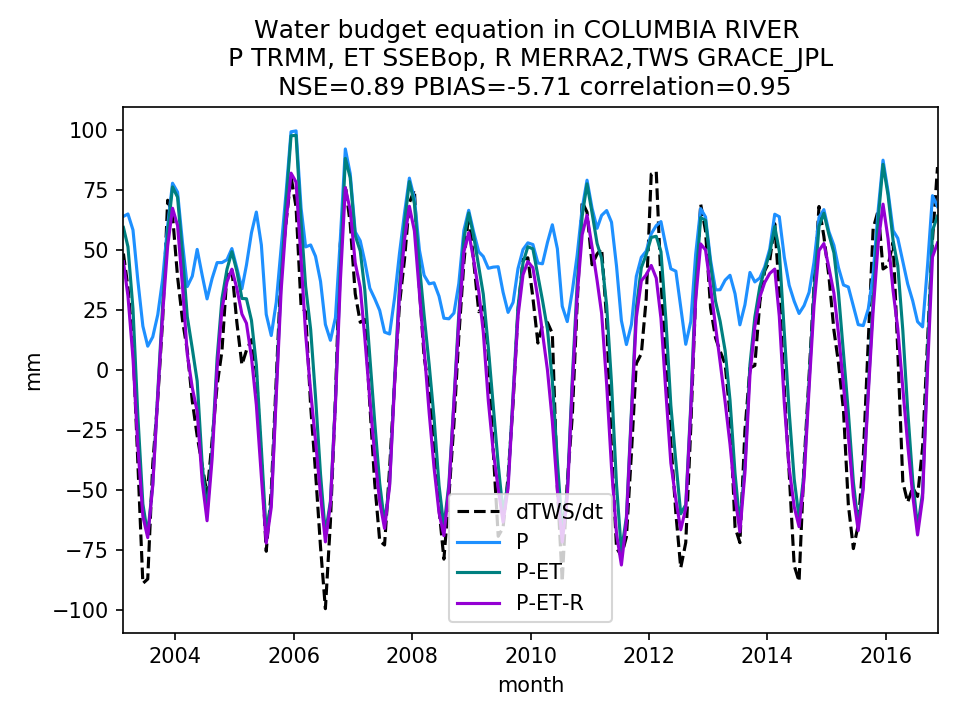

In [27]:
plot_water_budget_details(TWS,P,ET,R,time_idx,basin_name,data_P,data_ET,data_R,data_TWS)

<IPython.core.display.Javascript object>


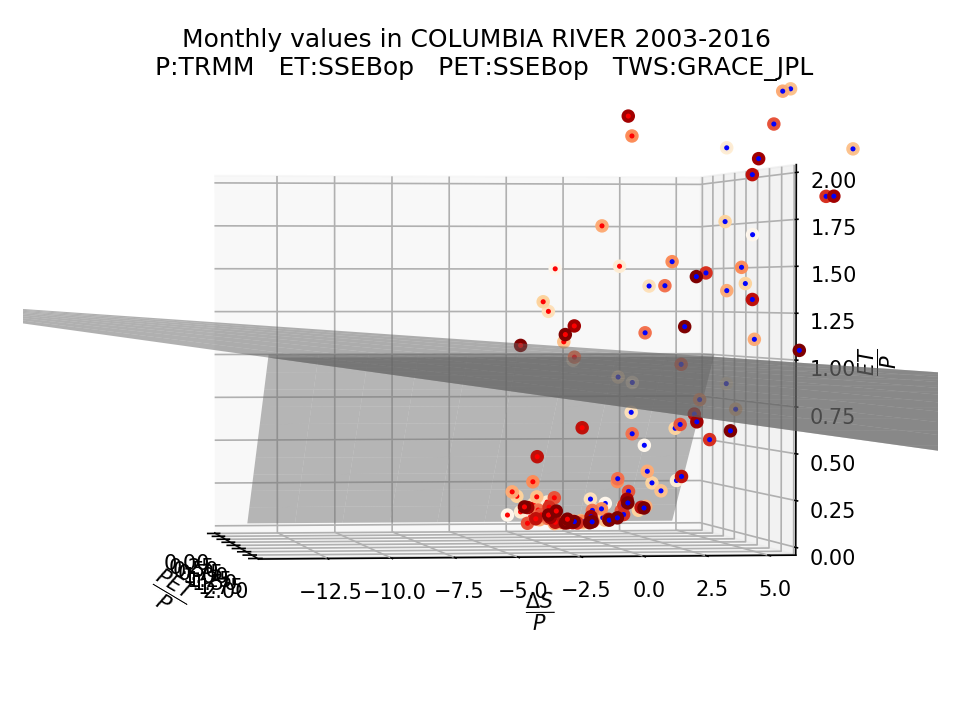

In [37]:
save=False

xmax=6
X=np.arange(1e-6,xmax+0.1,0.1)

x=PET.values/P.values
y=TWS.values/P.values
z=ET.values/P.values

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# water limit
xvec=np.arange(1,1.1*x.max()+0.1,0.1)
yvec=np.linspace(y.min(),y.max(),10)
(Xvec,Yvec)=np.meshgrid(xvec,yvec)
ax.plot_surface(Xvec,Yvec,np.ones_like(Xvec),color='grey',alpha=0.5)

# energy limit
xvec=np.arange(x.min(),1.1,0.1)
yvec=np.linspace(y.min(),y.max(),10)
(Xvec,Yvec)=np.meshgrid(xvec,yvec)
ax.plot_surface(Xvec,Yvec,Xvec,color='grey',alpha=0.5)
        
# edgecolors depending on year        
nb_year=np.unique(time_idx.year).shape[0]-1
cmap=cm.get_cmap('OrRd',nb_year)
color_years=cmap((time_idx.year-time_idx.year[0])/nb_year)
scatter=ax.scatter(x.flatten(),y.flatten(),z.flatten(),c=time_idx.year,cmap=cm.get_cmap('OrRd'))

# facecolors depending on TWS
nb_year=x.shape[0]-1
# colormap
#cmap=cm.get_cmap('coolwarm',nb_year)
#color_TWS=cmap(normalize(TWS_annual,a=0,b=1).values.flatten())

# 2 colors
color_TWS=np.where(TWS.values.flatten()<0,'red','blue')

ax.scatter(x.flatten(),y.flatten(),z.flatten(),c=color_TWS,edgecolors=color_years,linewidths=2)

#legend1 = ax.legend(*scatter.legend_elements(),
                    #loc="lower right", title="year",ncol=3,fontsize='x-small')
#ax.add_artist(legend1)

ax.set_zlim([0,2])
ax.set_xlim([0,2])

#plt.ylim([0,1.3])

ax.set_xlabel('$\dfrac{PET}{P}$')
ax.set_ylabel('$\dfrac{\Delta S}{P}$')
ax.set_zlabel('$\dfrac{ET}{P}$')
ax.set_title('Monthly values in {} {}-{} \n P:{}   ET:{}   PET:{}   TWS:{}'.format(basin_name,time_idx[0].year,
                                    time_idx[-1].year,data_P,data_ET,data_PET,data_TWS))
ax.view_init(1,269)

if save:
    fig.savefig('../plots/budyko_curves/monthly3D_{}_TWS.png'.format(basin_name))
fig.tight_layout()
plt.show()

In [2]:
#approximate=True
#if approximate:
#    cmap_climate=ListedColormap(np.loadtxt("../datasets/other/koppen_geiger_color_array_approx.csv"))
#else:
#    cmap_climate=ListedColormap(np.loadtxt("../datasets/other/koppen_geiger_color_array.csv"))

In [3]:
def test_same_spatial_grid(spatial_grid_ref,spatial_grid_test):
    if spatial_grid_ref.shape!=spatial_grid_test.shape:
        return False
    if (spatial_grid_ref['x']!=spatial_grid_test['x']).any():
        return False
    if (spatial_grid_ref['y']!=spatial_grid_test['y']).any():
        return False
    return True

In [5]:
time_idx=pd.date_range(start='01-2003',end='1-2017',freq='SM')[::2]
basins=load_basins_data(approximate)

In [6]:
def load_data_Budyko(data_P,data_R,data_ET,data_TWS,data_PET):
    (spatial_grid,P_grid,time_P)=load_hydro_data('P',data_P,time_idx,
                                version=version_data[data_P]) # P serves as a reference grid
    (spatial_grid_ET,ET_grid,time_ET)=load_hydro_data('ET',data_ET,time_idx,
                                                    version=version_data[data_ET])
    # check if ET has the same spatial grid as P
    same_ET=test_same_spatial_grid(spatial_grid,spatial_grid_ET)

    (spatial_grid_R,R_grid,time_R)=load_hydro_data('R',data_R,time_idx,
                                                version=version_data[data_R])
    # check if R has the same spatial grid as P
    same_R=test_same_spatial_grid(spatial_grid,spatial_grid_R)

    (spatial_grid_TWS,TWS_grid,time_TWS)=load_hydro_data('TWS',data_TWS,
                                    time_idx,version=version_data[data_TWS])
    # check if TWS has the same spatial grid as P
    same_TWS=test_same_spatial_grid(spatial_grid,spatial_grid_TWS)
    
    (spatial_grid_PET,PET_grid,time_PET)=load_hydro_data('PET',data_PET,time_idx,
                                                version=version_data[data_PET])
    return spatial_grid,spatial_grid_R,spatial_grid_ET,spatial_grid_TWS,spatial_grid_PET,same_ET,same_R,same_TWS,P_grid,ET_grid,R_grid,TWS_grid,PET_grid

    
def load_basin_data(basin_name):
    my_basin=basins.loc[[basin_name],'geometry']
    
    # extract grid points for a given basin
    final_selection=find_coordinates_inside_basin(my_basin,spatial_grid,basins)

    if same_ET: # if the grid is the same, we duplicate the reference grid
        final_selection_ET=final_selection.copy()
    else:
        final_selection_ET=find_coordinates_inside_basin(my_basin,spatial_grid_ET,basins)

    if same_R:
        final_selection_R=final_selection.copy()
    else:
        final_selection_R=find_coordinates_inside_basin(my_basin,spatial_grid_R,basins)

    if same_TWS:
        final_selection_TWS=final_selection.copy()
    else:
        final_selection_TWS=find_coordinates_inside_basin(my_basin,spatial_grid_TWS,basins)
    
    final_selection_PET=find_coordinates_inside_basin(my_basin,spatial_grid_PET,basins)
    
    # select hydrological variables for the basin of interest
    P_basin=P_grid.loc[final_selection.index]
    ET_basin=ET_grid.loc[final_selection_ET.index]
    R_basin=R_grid.loc[final_selection_R.index]
    TWS_basin=TWS_grid.loc[final_selection_TWS.index]
    PET_basin=PET_grid.loc[final_selection_PET.index]

    # fill missing values (temporal + spatial scale)
    P_basin,fillingP=my_fillna(P_basin,'P',time_idx,data_P,version=version_data[data_P])
    ET_basin,fillingET=my_fillna(ET_basin,'ET',time_idx,data_ET,version=version_data[data_ET])
    R_basin,fillingR=my_fillna(R_basin,'R',time_idx,data_R,version=version_data[data_R])
    TWS_basin,fillingTWS=my_fillna(TWS_basin,'TWS',time_idx,data_TWS,version=version_data[data_TWS])

    if fillingP&fillingET&fillingR&fillingTWS: # if this basin is entirely covered by all datasets, proceed, otherwise the loop ends
        # spatial average + filtering
        P_filter=hydrological_variables_basin_filtered(P_basin,'P',time_idx,data_P,version=version_data[data_P])[1]
        ET_filter=hydrological_variables_basin_filtered(ET_basin,'ET',time_idx,data_ET,version=version_data[data_ET])[1]
        R_filter=hydrological_variables_basin_filtered(R_basin,'R',time_idx,data_R,version=version_data[data_R])[1]
        TWSC_filter=hydrological_variables_basin_filtered(TWS_basin,'TWS',time_idx,data_TWS,version=version_data[data_TWS])[1]
        PET_filter=hydrological_variables_basin_filtered(PET_basin,'PET',time_idx,data_PET,version=version_data[data_PET])[1]
        
    return P_filter,PET_filter,TWSC_filter,ET_filter,R_filter

In [8]:
def plot_Budyko(P_filter,PET_filter,TWSC_filter,ET_filter,R_filter,useR=False,center_view=False):
    A_filter=P_filter-ET_filter-R_filter
    corr=A_filter.corr(TWSC_filter)
    PBIAS=percentage_bias(A_filter,TWSC_filter)
    NSE=compute_NSE(A_filter,TWSC_filter)

    X=pd.Series(PET_filter.values/(P_filter.values-TWSC_filter.values),index=P_filter.index,name='PET/P')
    useR=False
    if useR:
        Y=pd.Series(1-R_filter.values/(P_filter.values-TWSC_filter.values),index=P_filter.index,name='ET/P')
    else:
        Y=pd.Series(ET_filter.values/(P_filter.values-TWSC_filter.values),index=P_filter.index,name='ET/P')

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # water limit
    xvec=np.arange(1,1.1*X.max()+0.1,0.1)
    yvec=np.linspace(TWSC_filter.min(),TWSC_filter.max(),10)
    (Xvec,Yvec)=np.meshgrid(xvec,yvec)
    ax.plot_surface(Xvec,Yvec,np.ones_like(Xvec),color='grey',alpha=0.5)

    # energy limit
    xvec=np.arange(X.min(),1.1,0.1)
    yvec=np.linspace(TWSC_filter.min(),TWSC_filter.max(),10)
    (Xvec,Yvec)=np.meshgrid(xvec,yvec)
    ax.plot_surface(Xvec,Yvec,Xvec,color='grey',alpha=0.5)

    # budyko curve
    xvec=np.arange(0,1.1*X.max()+0.1,0.1)
    yvec=np.linspace(TWSC_filter.min(),TWSC_filter.max(),10)
    (Xvec,Yvec)=np.meshgrid(xvec,yvec)
    ax.plot_surface(Xvec,Yvec,Budyko(Xvec),color='blue',alpha=0.5)

    for i,year in enumerate(range(2003,2017)):
        ax.plot(X.loc[X.index.year==year],TWSC_filter.loc[TWSC_filter.index.year==year],
                 Y.loc[Y.index.year==year],'o',color=cm.get_cmap('OrRd',14)(i/14),label=year)
    ax.set_xlabel(r'$\frac{PET}{P-\Delta S}$')
    if useR:
        ax.set_zlabel(r'1-$\frac{R}{\Delta S}$')
    else:
        ax.set_zlabel(r'$\frac{ET}{P-\Delta S}$')
    ax.set_ylabel(r'$\Delta S$')
    ax.set_title('Monthly data in {} \n P {} - ET {} - R {} \n PET {} - TWS {} \n NSE={:.2f} PBIAS={:.2f} correlation={:.2f}'.format(basin_name,
                                           data_P,data_ET,data_R,data_PET,data_TWS,NSE,PBIAS,corr))
    if center_view:
        ax.set_xlim([0,5])
        ax.set_zlim([0,5])
    ax.view_init(1,269)
    plt.show()

In [9]:
data_P="TRMM"
data_R="MERRA2"
data_ET="SSEBop"
data_TWS="GRACE_JPL"
data_PET='SSEBop'

spatial_grid,spatial_grid_R,spatial_grid_ET,spatial_grid_TWS,spatial_grid_PET,same_ET,same_R,same_TWS,P_grid,ET_grid,R_grid,TWS_grid,PET_grid=load_data_Budyko(data_P,data_R,data_ET,data_TWS,data_PET) 

In [10]:
basin_name='ZAMBEZI'   
P_filter,PET_filter,TWSC_filter,ET_filter,R_filter=load_basin_data(basin_name)

<IPython.core.display.Javascript object>


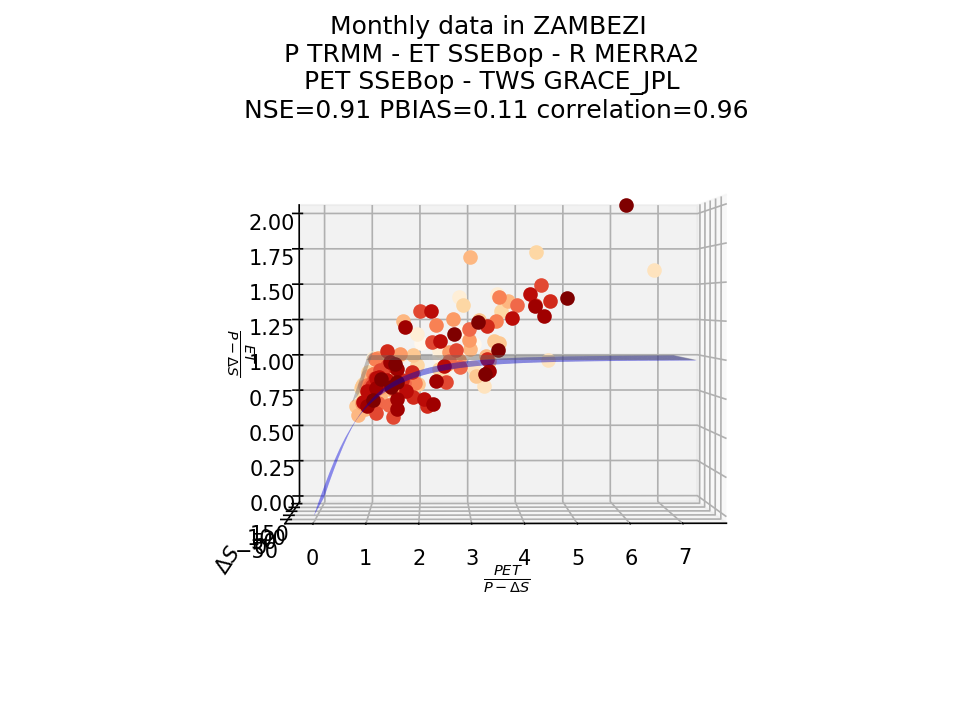

c:\users\fafal\miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [11]:
plot_Budyko(P_filter.loc[P_filter-TWSC_filter>=0],PET_filter.loc[P_filter-TWSC_filter>=0],
            TWSC_filter.loc[P_filter-TWSC_filter>=0],ET_filter.loc[P_filter-TWSC_filter>=0],
            R_filter.loc[P_filter-TWSC_filter>=0],useR=True)

<IPython.core.display.Javascript object>


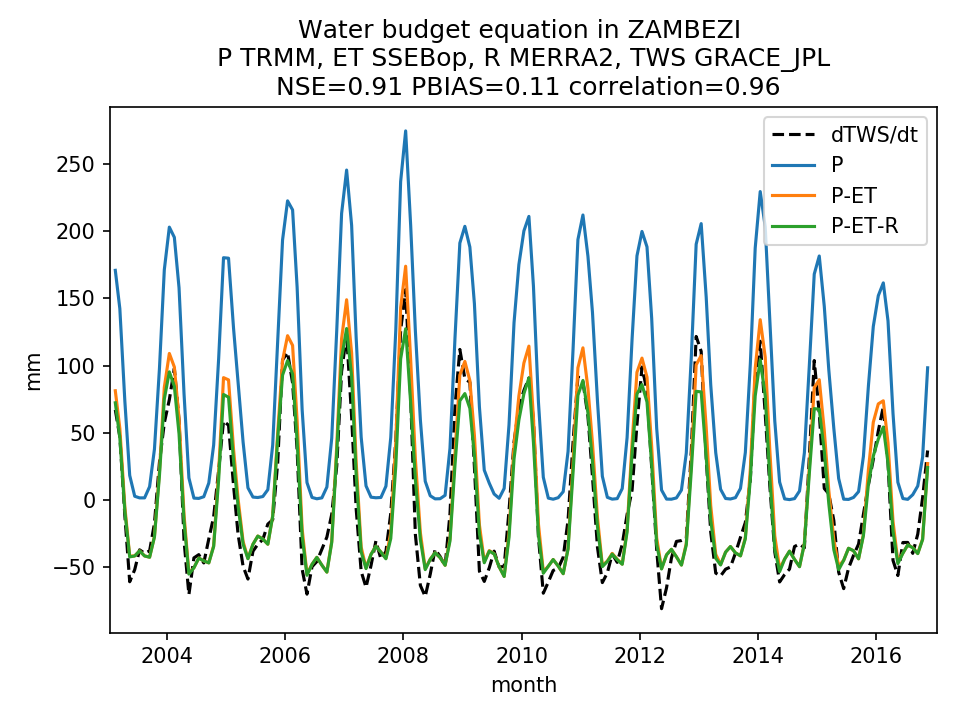

In [13]:
A_filter=P_filter-ET_filter-R_filter
corr=A_filter.corr(TWSC_filter)
PBIAS=percentage_bias(A_filter,TWSC_filter)
NSE=compute_NSE(A_filter,TWSC_filter)

plt.figure()
plt.plot(TWSC_filter,'k--',label='dTWS/dt')
plt.plot(P_filter,label='P')
plt.plot(P_filter-ET_filter,label='P-ET')
plt.plot(A_filter,label='P-ET-R')
plt.legend()
plt.title("Water budget equation in {} \n P {}, ET {}, R {}, TWS {} \n NSE={:.2f} PBIAS={:.2f} correlation={:.2f}".format(basin_name,
                        data_P,data_ET,data_R,data_TWS,NSE,PBIAS,corr))
plt.xlabel("month")
plt.ylabel("mm")
plt.xlim([date(2003,1,15),date(2017,1,15)])
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


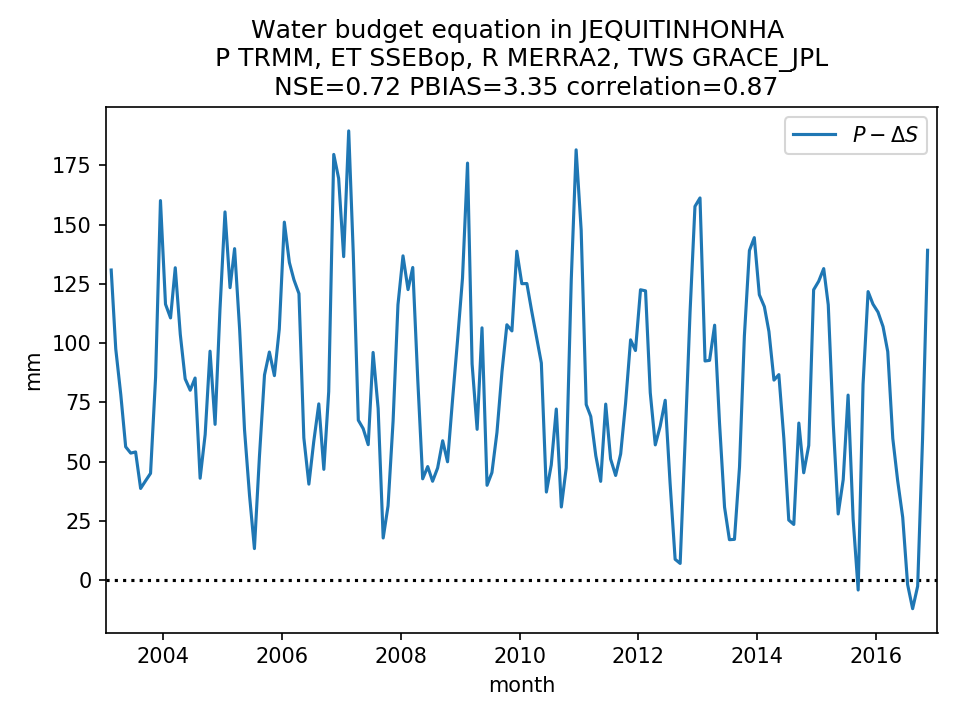

In [42]:
plt.figure()
plt.plot([date(2003,1,15),date(2017,1,15)],[0,0],'k:')
#plt.plot(P_filter-TWSC_filter,label='$P-\Delta S$')
plt.legend()
plt.title("Water budget equation in {} \n P {}, ET {}, R {}, TWS {} \n NSE={:.2f} PBIAS={:.2f} correlation={:.2f}".format(basin_name,
                        data_P,data_ET,data_R,data_TWS,NSE,PBIAS,corr))
plt.xlabel("month")
plt.ylabel("mm")
plt.xlim([date(2003,1,15),date(2017,1,15)])
plt.tight_layout()
plt.show()

# 3. Monthly timescale

<IPython.core.display.Javascript object>


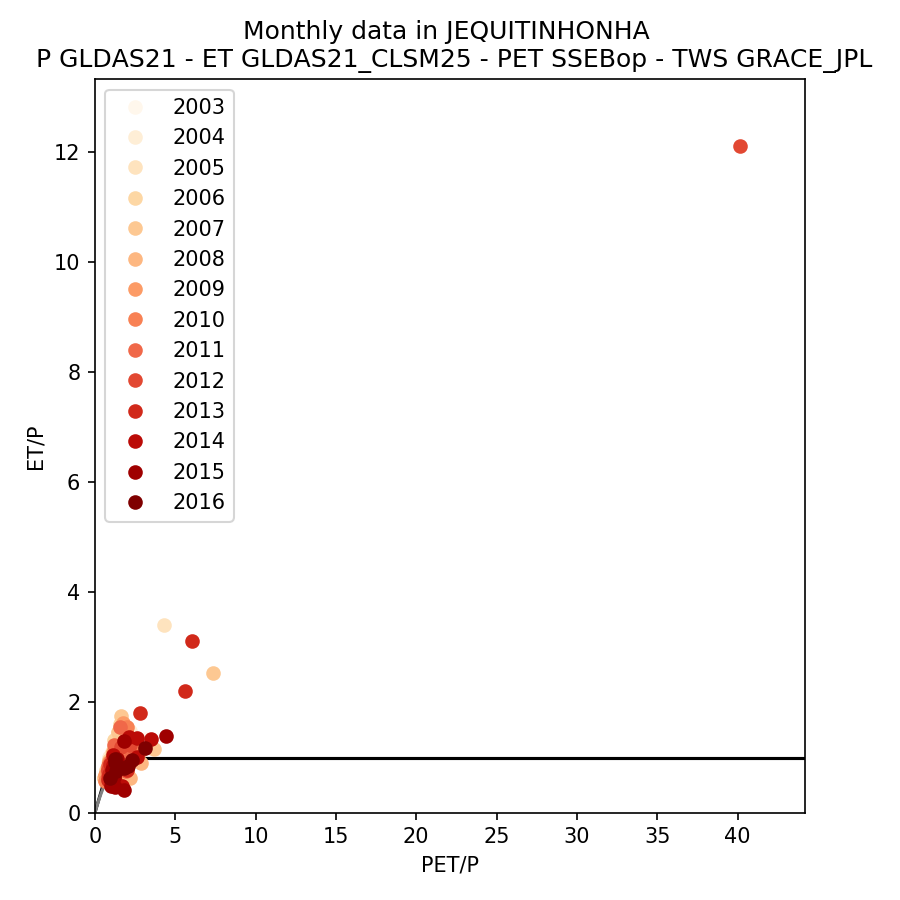

c:\users\fafal\miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [15]:
#Y=pd.Series(ET_basin_mean.values/P_basin_mean.values,index=time_idx,name='ET/P')
#X=pd.Series(PET_basin_mean.values/P_basin_mean.values,index=time_idx,name='PET/P')
Y=pd.Series(ET_filter.values/(P_filter.values-TWSC_filter.values),index=time_idx[1:-1],name='ET/P')
X=pd.Series(PET_filter.values/(P_filter.values-TWSC_filter.values),index=time_idx[1:-1],name='PET/P')

plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1],'k')
plt.plot([1,1.1*X.max()],[1,1],'k')
plt.plot(np.arange(0,1.8,0.1),Budyko(np.arange(0,1.8,0.1)),color='grey')
for i,year in enumerate(range(2003,2017)):
    plt.plot(X.loc[time_idx[1:-1].year==year],Y.loc[time_idx[1:-1].year==year],'o',color=cm.get_cmap('OrRd',14)(i/14),label=year)
plt.xlabel('PET/P')
plt.ylabel('ET/P')
plt.xlim([0,1.1*X.max()])
plt.ylim([0,1.1*Y.max()])
plt.legend()
plt.title('Monthly data in {} \n P {} - ET {} - PET {} - TWS {}'.format(basin_name,data_P,data_ET,data_PET,data_TWS))
plt.tight_layout()
plt.show()